---
# Solução Exercício 01 - Regressão Logística (iris dataset)
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**


## Introdução

### classificação da espécies das flores íris

Exemplo de treinamento supervisionado.  
Dados: Íris dataset (UCI Machine Learning Repository).  
Este talvez seja o banco de dados mais conhecido na literatura de reconhecimento de padrões. O artigo de Fisher é um clássico no campo e é referenciado com frequência até hoje. (Consulte Duda & Hart, por exemplo.)  

Características do conjunto de dados:  
Número de Instâncias 150 (50 em cada uma das três classes).  
Número de atributos: 4 atributos numéricos, preditivos e a classe.  
Informações sobre atributos:  
- comprimento da sépala (cm)  
- largura da sépala (cm)  
- comprimento da pétala (cm)  
- largura da pétala (cm)  

classe (tipos de espécies):
- Iris-Setosa  
- Iris-Versicolour  
- Iris-Virginica  
<br>  
<img src="https://thedatafrog.s3.amazonaws.com/media/images/iris.max-1000x500.png" width="400" height="200">

### **Descrição do projeto de machine learning**
Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  
Classificar as flores Íris em 3 espécies distintas: setosa, versicolor e virginica.  
**2- Descrição da solução de IA:**  
Treinamento supervisionado de modelo de classificação usando o algoritmo de regressão logistica (logistic regression).  
**3- Fonte de dados:**  
Iris dataset
http://archive.ics.uci.edu/ml/datasets/Iris/  
**4- Variáveis independentes (preditoras ou "features"):**  
comprimento da sépala (cm)  
largura da sépala (cm)  
comprimento da pétala (cm)  
largura da pétala (cm)  
**5- Variável dependente (resposta ou "target"):**  
espécie (setosa, versicolor e virginica)

Autor do caderno:  Fernando Melo  
Data:  09/03/2021  


## 1 - Carregar os dados e bibliotecas de código

In [18]:
# Carregar bibliotecas que serão utilizadas: (pandas, sklearn, etc)
import pandas as pd
import matplotlib.pyplot as plt

# Carregar Modelo de Regressão Logística
# pesquisar na documentação sklearn: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LogisticRegression #classificação
from sklearn.utils import shuffle


In [19]:
# Carregar dados
# Descubra na documentação sklearn como carregar o dataset iris
# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_iris

In [20]:
# Instanciar objeto com 
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 2 - Análise exploratória do dados

In [21]:
# Ler dados
iris = load_iris()

In [22]:
# Converter sklearn dataset em pandas dataframe
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']= iris.target
df.sample(5, random_state=42)
# df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [23]:
# Salvar o dataframe
df.to_csv('iris_dataset.csv', index=None)

In [24]:
# Analisar dimensões do dataset do Sklearn
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [25]:
# Podemos ler o dataframe que criamos acima com o seguinte código
testedf = pd.read_csv("iris_dataset.csv")
print(testedf.shape)
testedf.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# Lista o nome das colunas ou variáveis independentes ou preditoras ("features")
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
# Lista o rótulo ("labels") das classes (espécies das flores), também chamado de variável dependente ("target")
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
# mostrar as primeiras 5 linhas do dataset
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## 3 -  Pre-processamento dos dados (prepara os dados para treinar o modelo)

In [29]:
# Dataset Sklearn Iris
# atribui os valores das variáveis independentes a 'X'
X = iris.data
# atribui os valores da variável dependente a 'y'
y = iris.target

In [30]:
# Dividir dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## 4 - Treinar o modelo

In [31]:
# instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=1000) 

# treinar modelo
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 5 - Avaliar qualidade do modelo

(próximos capítulos)

Mas pensem em como vocês fariam para avaliar se o modelo é bom ou não.

In [32]:
# mostrar score do modelo sobre todo o dataset
reg_log.score(X_test, y_test)

0.9666666666666667

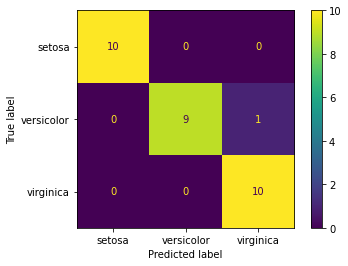

In [33]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(reg_log, X_test, y_test, display_labels=iris.target_names)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, display_labels=iris.target_names);

## Testar o modelo (inferência)

In [35]:
# fazer predição da espécie para uma nova flor com as dimensões: [5.1, 3.5, 1.4, 0.2]
lg_pred = reg_log.predict([[5.1, 3.5, 1.4, 0.2]])

In [36]:
# mostrar resultado da predição
print('nova predição:\nclasse = ', lg_pred)
print('classe = ', iris.target_names[lg_pred])

nova predição:
classe =  [0]
classe =  ['setosa']


## KNN Classificador

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# instancia modelo knn com k=3
knn = KNeighborsClassifier(n_neighbors=3)
# treina o modelo knn
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

1.0